In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
import src.lib.utility_classfier as uclf

/Users/juan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
data_path='data/temporal/'

In [10]:
df = pd.read_csv(path.join(data_path,'data.csv'))
df.shape

(109490, 533)

In [11]:
df.head(0)

,GRID,GENDER,Race_B,Race_W,AGE,DURATION_BF2007,Smoking,MAX_BMI_missing,MAX_VALUE_Chol_missing,MAX_VALUE_Creat_missing,...,CNT_MedCode_83367_2005,CNT_MedCode_83367_2006,CNT_MedCode_836_2000,CNT_MedCode_836_2001,CNT_MedCode_836_2002,CNT_MedCode_836_2003,CNT_MedCode_836_2004,CNT_MedCode_836_2005,CNT_MedCode_836_2006,Class


In [12]:
def case_contro_ratio(df):
    num_of_case = df[df['Class']==1].shape[0]
    num_of_control = df[df['Class']==0].shape[0]
    ratio = num_of_control/num_of_case
    return ratio, num_of_case, num_of_control

In [13]:
print('Intersect ratio %.2f, case %d, control %d'% (case_contro_ratio(df)[0],case_contro_ratio(df)[1], case_contro_ratio(df)[2]))

Intersect ratio 10.15, case 9824, control 99666


In [14]:
y=df.Class.values
df.drop(['GRID','Class'], axis=1, inplace=True)

In [15]:
feature_list=df.iloc[:,:(df.shape[1])].columns.tolist()

In [16]:
X = df.iloc[:,:(df.shape[1])].values
# X=np.load(path.join(data_path,'phemed_binary_value/X.npy'))

In [17]:
X.shape

(109490, 531)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train num',X_train.shape[0])
print('X_test num',X_test.shape[0])

X_train num 87592
X_test num 21898


In [21]:
def case_contro_ratio(y):
    num_of_case = y[y==1].shape[0]
    num_of_control = y[y==0].shape[0]
    ratio = num_of_control/num_of_case
    return ratio, num_of_case, num_of_control
pos_ratio = case_contro_ratio(y_test)[1]/y_test.shape[0]

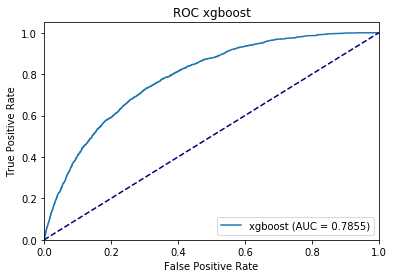

In [22]:
import xgboost as xgb

param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 100
xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test)

bst = xgb.train(param, xgtrain, num_round)
# make prediction
preds = bst.predict(xgtest)
uclf.compute_roc(y_test,preds,'xgboost')

Average precision-recall score: 0.26


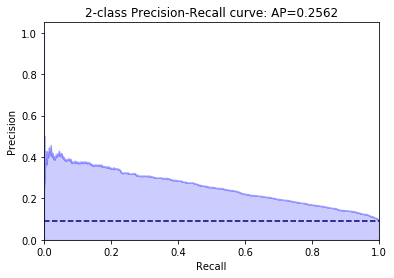

In [23]:
uclf.plot_prc(y_test,preds,pos_ratio)

In [24]:
import sklearn.preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
# scalter = Normalizer()
# scalter.fit(X_train)
# X_train = scalter.transform(X_train)
# X_test = scalter.transform(X_test)

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_scaled = max_abs_scaler.fit_transform(X_train)
X_test_scaled = max_abs_scaler.transform(X_test)

In [25]:
# logic_regression
# # scale the data, make each feature 0 mean and 1 variance
from sklearn import preprocessing
#X_train_scaled = preprocessing.scale(X_train)
#X_test_scaled = preprocessing.scale(X_test)
y_score = uclf.logic_regression(X_train, y_train,X_test, y_test,10,feature_list,14)

0.26489587532263675
0.2679913465248789
Classification report
             precision    recall  f1-score   support

          0       0.91      0.99      0.95     19953
          1       0.42      0.05      0.08      1945

avg / total       0.87      0.91      0.88     21898

Confusion_matrix
[[19827   126]
 [ 1855    90]]
done in 84.788984s
(1, 531)
1. feature Smoking (0.224030)
2. feature CNT_272_2006 (0.102759)
3. feature CNT_395_2006 (0.098637)
4. feature CNT_425_2006 (0.086982)
5. feature STD_VALUE_Gluc_2000 (0.074058)
6. feature CNT_401_2005 (0.061366)
7. feature CNT_101_2005 (0.054401)
8. feature CNT_401_2006 (0.046943)
9. feature CNT_MedCode_296_2006 (0.042732)
10. feature CNT_101_2006 (0.042250)
11. feature CNT_401_2004 (0.042085)
12. feature STD_BMI_2006 (0.039428)
13. feature STD_BMI_2004 (0.036948)
14. feature MIN_BMI_2000 (0.034797)


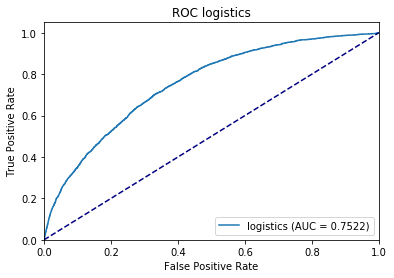

In [26]:
uclf.compute_roc(y_test,y_score,'logistics')

Average precision-recall score: 0.24


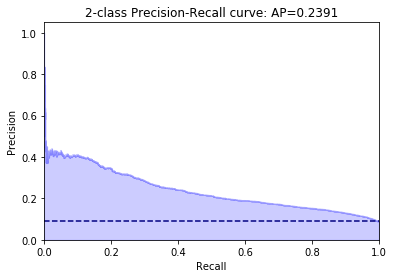

In [27]:
uclf.plot_prc(y_test,y_score,pos_ratio)

In [28]:
y_score = uclf.logic_regression(X_train_scaled, y_train,X_test_scaled, y_test,1,feature_list,14)

0.25965100016164927
0.25851667923170263
Classification report
             precision    recall  f1-score   support

          0       0.91      0.99      0.95     19953
          1       0.44      0.04      0.08      1945

avg / total       0.87      0.91      0.87     21898

Confusion_matrix
[[19850   103]
 [ 1865    80]]
done in 9.928888s
(1, 531)
1. feature DURATION_BF2007 (7.552133)
2. feature CNT_425_2006 (3.951921)
3. feature AGE (3.046431)
4. feature CNT_395_2006 (2.919753)
5. feature CNT_MedCode_1191_2006 (2.513346)
6. feature CNT_MedCode_32968_2006 (2.363204)
7. feature CNT_MedCode_35296_2006 (1.930209)
8. feature STD_VALUE_Creat_2000 (1.895693)
9. feature STD_VALUE_Gluc_2000 (1.876212)
10. feature CNT_MedCode_1202_2006 (1.817419)
11. feature CNT_MedCode_32968_2005 (1.704233)
12. feature CNT_101_2005 (1.700974)
13. feature CNT_272_2006 (1.605839)
14. feature CNT_MedCode_11289_2006 (1.574388)


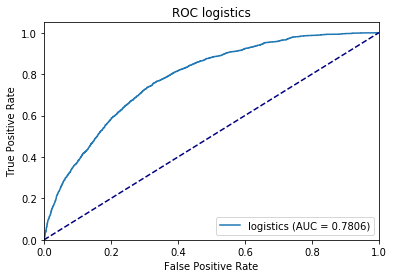

In [29]:
uclf.compute_roc(y_test,y_score,'logistics')

Average precision-recall score: 0.26


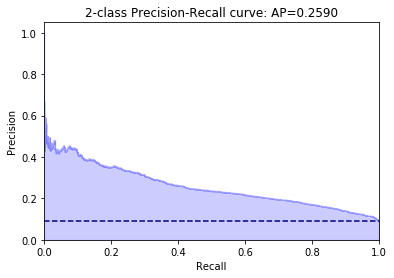

In [30]:
uclf.plot_prc(y_test,y_score,pos_ratio)

Classification report
             precision    recall  f1-score   support

          0       0.91      1.00      0.95     19953
          1       0.38      0.00      0.00      1945

avg / total       0.86      0.91      0.87     21898

Confusion_matrix
[[19948     5]
 [ 1942     3]]
done in 35.169630s
1. feature DURATION_BF2007 (0.013067)
2. feature CNT_MedCode_1191_2006 (0.010754)
3. feature AGE (0.009565)
4. feature CNT_401_2006 (0.007782)
5. feature MAX_SYSTOLIC_2006 (0.006887)
6. feature MIN_BMI_2000 (0.006443)
7. feature MEDIAN_BMI_2005 (0.006234)
8. feature MAX_BMI_2006 (0.006204)
9. feature MEDIAN_SYSTOLIC_2006 (0.006138)
10. feature MAX_BMI_2002 (0.006099)
11. feature MAX_BMI_2001 (0.006089)
12. feature MIN_BMI_2006 (0.006074)
13. feature MEDIAN_BMI_2006 (0.006042)
14. feature MIN_BMI_2005 (0.006005)
15. feature MAX_BMI_2003 (0.006003)
16. feature MEDIAN_BMI_2001 (0.005969)
17. feature MEDIAN_BMI_2002 (0.005960)
18. feature MAX_BMI_2000 (0.005956)
19. feature MAX_BMI_2005 (0.0

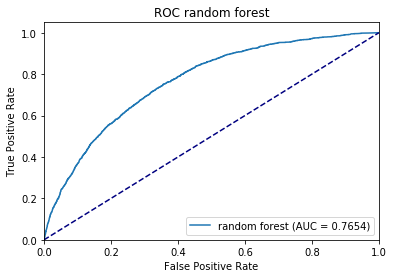

In [31]:
y_score = uclf.random_forest(X_train, y_train,X_test, y_test,feature_list)
uclf.compute_roc(y_test,y_score,'random forest')

Average precision-recall score: 0.24


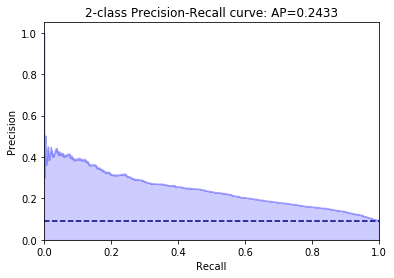

In [32]:
uclf.plot_prc(y_test,y_score,pos_ratio)

Classification report
             precision    recall  f1-score   support

          0       0.91      0.99      0.95     19953
          1       0.45      0.04      0.08      1945

avg / total       0.87      0.91      0.88     21898

Confusion_matrix
[[19848   105]
 [ 1860    85]]
done in 329.297622s
1. feature AGE (0.085022)
2. feature DURATION_BF2007 (0.071521)
3. feature CNT_MedCode_1191_2006 (0.033571)
4. feature Smoking (0.027945)
5. feature CNT_395_2006 (0.026702)
6. feature CNT_MedCode_32968_2006 (0.025428)
7. feature CNT_401_2006 (0.021244)
8. feature CNT_272_2006 (0.020248)
9. feature CNT_MedCode_35296_2006 (0.015792)
10. feature CNT_425_2006 (0.014107)
11. feature CNT_MedCode_11289_2006 (0.013790)
12. feature MAX_SYSTOLIC_2006 (0.013558)
13. feature CNT_MedCode_20352_2006 (0.012962)
14. feature CNT_MedCode_1202_2006 (0.012251)
15. feature CNT_MedCode_83367_2006 (0.011930)
16. feature CNT_MedCode_4603_2006 (0.011073)
17. feature CNT_MedCode_6918_2006 (0.011033)
18. feature 

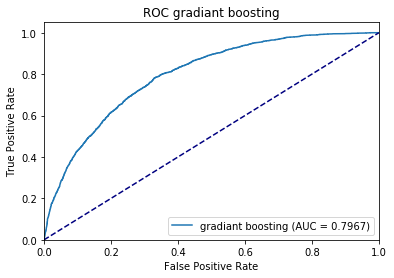

In [33]:
y_score = uclf.gradiant_boosting(X_train, y_train,X_test, y_test,feature_list,20)
uclf.compute_roc(y_test,y_score,'gradiant boosting')

Average precision-recall score: 0.28


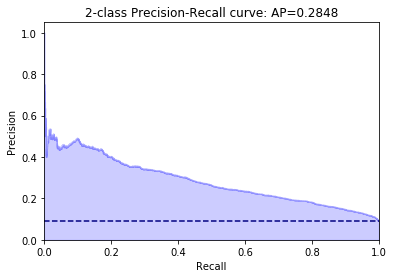

In [34]:
uclf.plot_prc(y_test,y_score,pos_ratio)

## feature selection by L1 

In [35]:
#feature selection by L1 
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_new = model.transform(X_train)
print(X_train_new.shape)
X_test_new = model.transform(X_test)
print(X_test_new.shape)

#logica regression with selected features
X_train_new_scaled = max_abs_scaler.fit_transform(X_train_new)
X_test_new_scaled = max_abs_scaler.transform(X_test_new)
y_score = uclf.logic_regression(X_train_new_scaled, y_train,X_test_new_scaled, y_test,10,feature_list,20)
uclf.compute_roc(y_test,y_score,'logistics')

(87592, 322)
(21898, 322)


## feature selection with Trees

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)

In [38]:
model = SelectFromModel(clf, prefit=True)
X_train_new = model.transform(X_train)
print(X_train_new.shape)
X_test_new = model.transform(X_test)
print(X_test_new.shape)

(87592, 199)
(21898, 199)


In [39]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
importances = clf.feature_importances_ 
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 3 (0.008385)
2. feature 4 (0.008330)
3. feature 369 (0.007913)
4. feature 292 (0.006679)
5. feature 21 (0.006271)
6. feature 5 (0.005653)
7. feature 40 (0.005588)
8. feature 495 (0.005524)
9. feature 35 (0.005487)
10. feature 38 (0.005468)


0.26165977909701854
0.2592281577794662
Classification report
             precision    recall  f1-score   support

          0       0.91      0.99      0.95     19953
          1       0.44      0.04      0.08      1945

avg / total       0.87      0.91      0.88     21898

Confusion_matrix
[[19846   107]
 [ 1862    83]]
done in 6.531359s
(1, 199)
1. feature AGE (9.702903)
2. feature MEDIAN_VALUE_Trigs_2004 (7.066332)
3. feature MEDIAN_VALUE_Gluc_2005 (4.109461)
4. feature STD_BMI_2000 (4.028243)
5. feature MIN_BMI_2000 (3.753103)
6. feature Race_W (3.124809)
7. feature MAX_VALUE_Gluc_2001 (3.045237)
8. feature STD_SYSTOLIC_2006 (2.861984)
9. feature MEDIAN_VALUE_Trigs_2006 (2.755551)
10. feature MEDIAN_VALUE_LDL-C_2006 (2.552134)
11. feature MAX_VALUE_Creat_2003 (2.538574)
12. feature MAX_VALUE_Creat_2001 (2.507809)
13. feature MAX_VALUE_HDL-C_2005 (2.459906)
14. feature MEDIAN_VALUE_Trigs_2000 (2.288119)
15. feature MAX_VALUE_Chol_2006 (2.193784)
16. feature MIN_DIASTOLIC_2004 (2.17

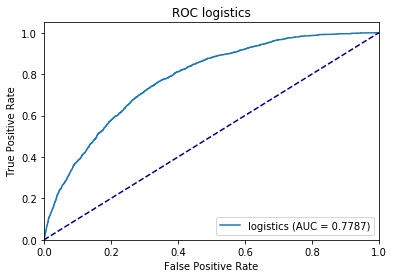

In [40]:
#logica regression with selected features
#logica regression with selected features
X_train_new_scaled = max_abs_scaler.fit_transform(X_train_new)
X_test_new_scaled = max_abs_scaler.transform(X_test_new)
y_score = uclf.logic_regression(X_train_new_scaled, y_train,X_test_new_scaled, y_test,10,feature_list,20)
uclf.compute_roc(y_test,y_score,'logistics')